# Spotting Cars

### Part 1

In [1]:
import numpy as np
np.random.seed(1337)

import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [2]:
# Function to create CNN
def make_convnet(img_size, channels, loss="binary_crossentropy", optimizer="adam"):
    """ Creates a CNN for binary image classification."""

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                    activation='relu',
                    input_shape=(img_size, img_size, channels)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss=loss,
                optimizer=optimizer,
                metrics=['accuracy'])

    return model

# Data generators
data_gen = ImageDataGenerator(rescale=1.0/255)

imgdir = 'data/a5_images'
img_size = 64
batch_size = 32

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=1337,
        shuffle=True)

validation_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=1337,
        shuffle=True)

Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [3]:
model = make_convnet(64, 3)

model_training = model.fit(train_generator,
          batch_size=32,
          steps_per_epoch = len(train_generator),
          epochs=10,
          verbose=1,
          validation_data=(validation_generator))

Epoch 1/10
50/50 [==============================] - 8s 146ms/step - loss: 0.6536 - accuracy: 0.6106 - val_loss: 0.5769 - val_accuracy: 0.7188
Epoch 2/10
50/50 [==============================] - 7s 143ms/step - loss: 0.5513 - accuracy: 0.7244 - val_loss: 0.5219 - val_accuracy: 0.7500
Epoch 3/10
50/50 [==============================] - 8s 161ms/step - loss: 0.4645 - accuracy: 0.7956 - val_loss: 0.5044 - val_accuracy: 0.7552
Epoch 4/10
50/50 [==============================] - 12s 237ms/step - loss: 0.4291 - accuracy: 0.8087 - val_loss: 0.5049 - val_accuracy: 0.7812
Epoch 5/10
50/50 [==============================] - 10s 202ms/step - loss: 0.3619 - accuracy: 0.8425 - val_loss: 0.5368 - val_accuracy: 0.7500
Epoch 6/10
50/50 [==============================] - 9s 178ms/step - loss: 0.3027 - accuracy: 0.8706 - val_loss: 0.5206 - val_accuracy: 0.7795
Epoch 7/10
50/50 [==============================] - 9s 173ms/step - loss: 0.2248 - accuracy: 0.9125 - val_loss: 0.6099 - val_accuracy: 0.7622
Epoc

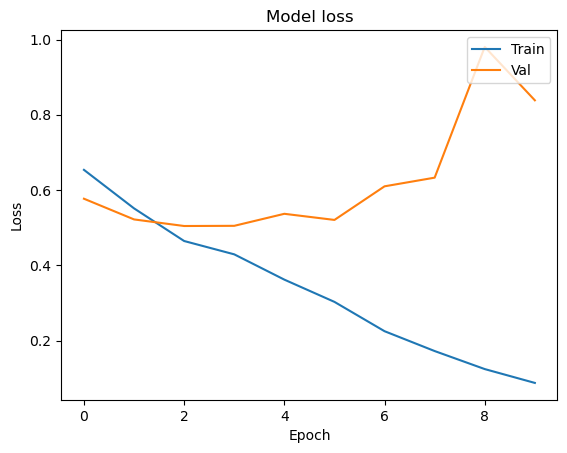

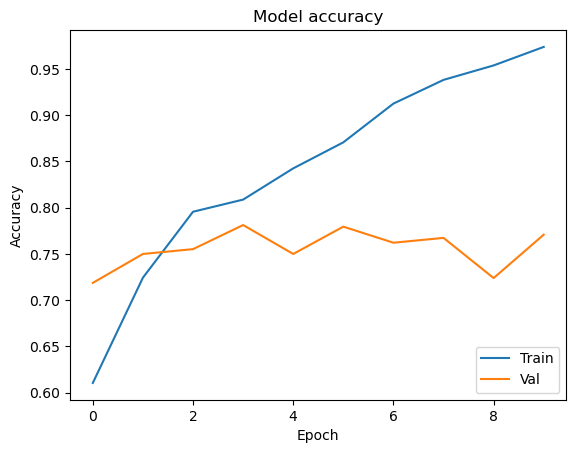

In [4]:
# Plot the loss
plt.plot(model_training.history['loss'])
plt.plot(model_training.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Plot the accuracy
plt.plot(model_training.history['accuracy'])
plt.plot(model_training.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### Part 2

In [5]:
# New data generator
new_data_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = False,
    fill_mode = "reflect")

imgdir = 'data/a5_images'
img_size = 64
batch_size = 32

train_generator = new_data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=1337,
        shuffle=True)

Found 1600 images belonging to 2 classes.


In [6]:
model = make_convnet(64, 3)

model_training = model.fit(train_generator,
          batch_size=batch_size,
          steps_per_epoch = len(train_generator),
          epochs=10,
          verbose=1,
          validation_data=(validation_generator))

Epoch 1/10
50/50 [==============================] - 14s 252ms/step - loss: 0.6976 - accuracy: 0.5869 - val_loss: 0.6351 - val_accuracy: 0.6597
Epoch 2/10
50/50 [==============================] - 11s 213ms/step - loss: 0.6214 - accuracy: 0.6562 - val_loss: 0.6048 - val_accuracy: 0.7049
Epoch 3/10
50/50 [==============================] - 10s 204ms/step - loss: 0.5903 - accuracy: 0.7044 - val_loss: 0.6144 - val_accuracy: 0.6788
Epoch 4/10
50/50 [==============================] - 11s 216ms/step - loss: 0.5613 - accuracy: 0.7231 - val_loss: 0.5895 - val_accuracy: 0.7083
Epoch 5/10
50/50 [==============================] - 11s 213ms/step - loss: 0.5790 - accuracy: 0.7206 - val_loss: 0.5735 - val_accuracy: 0.7222
Epoch 6/10
50/50 [==============================] - 10s 204ms/step - loss: 0.5464 - accuracy: 0.7269 - val_loss: 0.5661 - val_accuracy: 0.6997
Epoch 7/10
50/50 [==============================] - 11s 226ms/step - loss: 0.5639 - accuracy: 0.7350 - val_loss: 0.5355 - val_accuracy: 0.7483

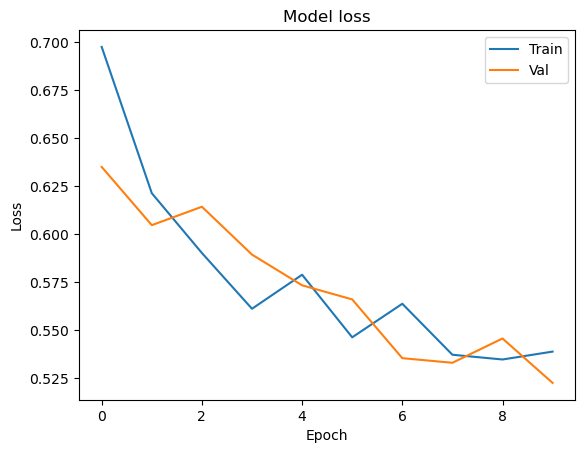

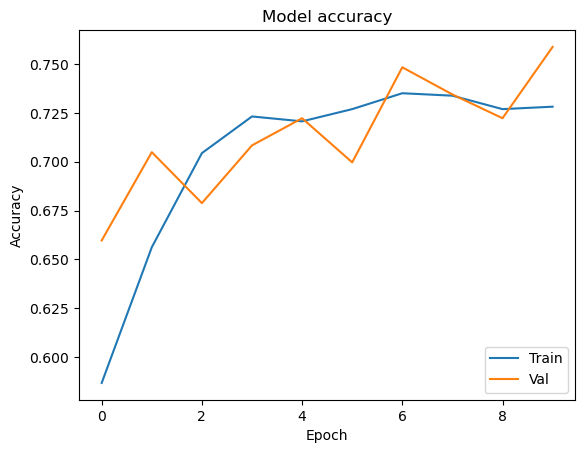

In [7]:
# Plot the loss
plt.plot(model_training.history['loss'])
plt.plot(model_training.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Plot the accuracy
plt.plot(model_training.history['accuracy'])
plt.plot(model_training.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

After using some data augmentation the model no longer overfits to the training data. The validation accuracy is the same as before so there was no improvement, but the training accuracy follows the validation accuracy curve better. This could potentially be seen as a more robust model to use on completely new data. The sane pattern can be seen in the plot for the loss. 

In [8]:
# Load the VGG16 model
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

vggmodel = applications.VGG16(weights='imagenet', include_top=True)

In [9]:
# Selected image
image = load_img("data/a5_images/train/other/0016.jpg", target_size=(224,224))
image = img_to_array(image)
image = preprocess_input(image)
image = image.reshape(1, 224, 224, 3)

pred = vggmodel.predict(image)

print(decode_predictions(pred))

1/1 [==============================] - 1s 565ms/step
[[('n02096437', 'Dandie_Dinmont', 0.6294407), ('n02113624', 'toy_poodle', 0.14890324), ('n02113712', 'miniature_poodle', 0.092601284), ('n02085936', 'Maltese_dog', 0.06307342), ('n02095889', 'Sealyham_terrier', 0.01171247)]]


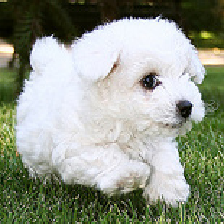

In [10]:
# Image we used
load_img("data/a5_images/train/other/0016.jpg", target_size=(224,224))

The prediction makes a lot of sense. The top 5 predictions are all dogs and looks very similar to the image we selected, white, fluffy and cute. 

### Part 3

In [11]:
img_size = 64
batch_size = 32

feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))
# Create new DataGen
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

def create_vgg16_features(directory, file_name):
    """"""
    # Make a generator
    generator = vgg_data_gen.flow_from_directory(
        directory,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=1337,
        shuffle=False)
    
    # Apply the model on the generator
    cnn_features = feature_extractor.predict(generator)

    # Save np.array to file
    with open(file_name, "wb") as f:
        np.save(f, cnn_features)

In [12]:
# Train data
create_vgg16_features("data/a5_images/train/", "vgg16_train")

# Validation data
create_vgg16_features("data/a5_images/validation/", "vgg16_val")

Found 1600 images belonging to 2 classes.
50/50 [==============================] - 34s 683ms/step
Found 576 images belonging to 2 classes.
18/18 [==============================] - 14s 733ms/step


In [13]:
def get_labels(n):
    return np.array([0]*(n//2) + [1]*(n//2))

def train_on_cnnfeatures(train_file, val_file):
    # Load train data
    with open(train_file, "rb") as f:
        train_data = np.load(f)
    # Load validation data
    with open(val_file, "rb") as f:
        val_data = np.load(f)
    
    train_labels = get_labels(len(train_data))
    val_labels = get_labels(len(val_data))


    # Create classifier
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=['accuracy'])

    # Train the model on 
    model_training = model.fit(x=train_data, y=train_labels,
          batch_size=32,
          steps_per_epoch=50,
          epochs=10,
          verbose=1,
          validation_data=(val_data, val_labels))
    
    return model_training

In [14]:
vgg16_clf = train_on_cnnfeatures("vgg16_train", "vgg16_val")

Epoch 1/10
50/50 [==============================] - 3s 22ms/step - loss: 2.0306 - accuracy: 0.8650 - val_loss: 0.9101 - val_accuracy: 0.8785
Epoch 2/10
50/50 [==============================] - 1s 14ms/step - loss: 0.2075 - accuracy: 0.9588 - val_loss: 0.7629 - val_accuracy: 0.8941
Epoch 3/10
50/50 [==============================] - 1s 14ms/step - loss: 0.0388 - accuracy: 0.9906 - val_loss: 0.6631 - val_accuracy: 0.8941
Epoch 4/10
50/50 [==============================] - 1s 14ms/step - loss: 0.0041 - accuracy: 0.9981 - val_loss: 0.7327 - val_accuracy: 0.8993
Epoch 5/10
50/50 [==============================] - 1s 13ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.7253 - val_accuracy: 0.8958
Epoch 6/10
50/50 [==============================] - 1s 14ms/step - loss: 2.9822e-04 - accuracy: 1.0000 - val_loss: 0.7207 - val_accuracy: 0.8976
Epoch 7/10
50/50 [==============================] - 1s 15ms/step - loss: 2.3353e-04 - accuracy: 1.0000 - val_loss: 0.7225 - val_accuracy: 0.8993
Epoch

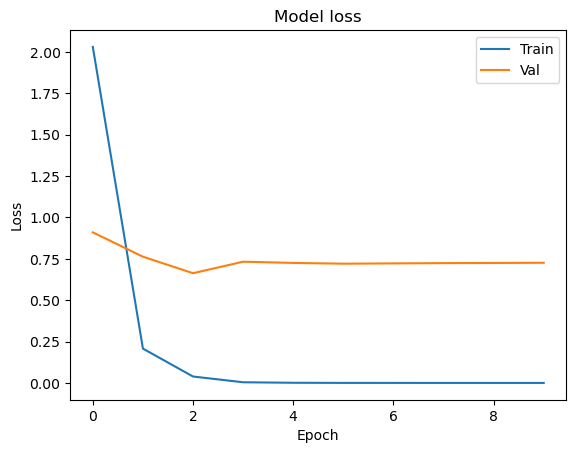

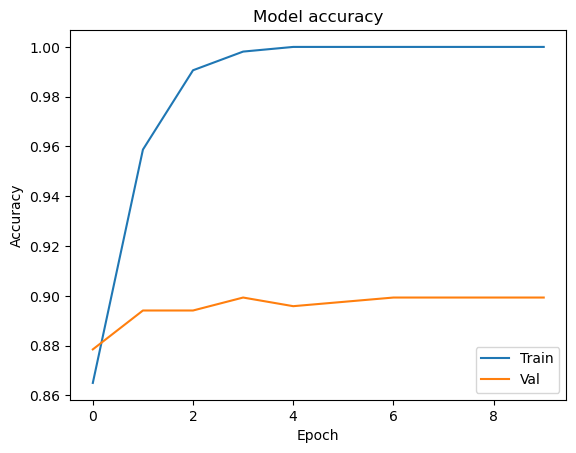

In [15]:
# Plot the loss
plt.plot(vgg16_clf.history['loss'])
plt.plot(vgg16_clf.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Plot the accuracy
plt.plot(vgg16_clf.history['accuracy'])
plt.plot(vgg16_clf.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

The accuracy is significantly higher now. The validation accuracy for the previous CNN was around 75%, and for the new model its around 90%. 

The reason for the difference is because of the transfer learning process where we have leveraged the knowledge from the VGG16 model by using it as a fearture extractor. The VGG16 model is trained on a lot more data than we have available, and the model have probably seen cars during the training. The weights should therefore already be adjusted to find the best features and potentially also to spotting cars.

### Part 4

In [16]:
first_layer_weights = vggmodel.get_weights()[0]
first_layer_weights.shape

(3, 3, 3, 64)

In [17]:
def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 

    return k

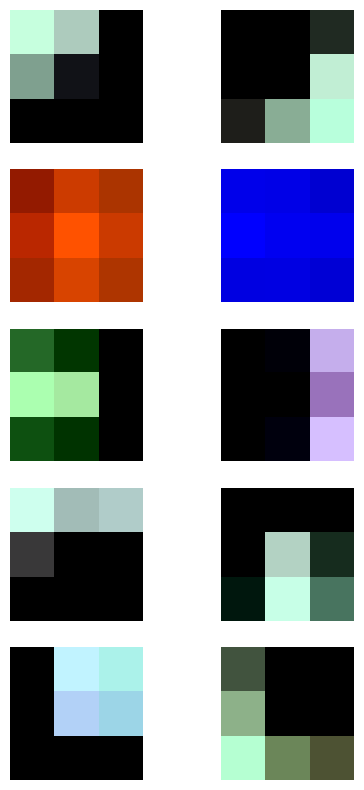

In [18]:
fig, ax = plt.subplots(5, 2, figsize=(5,10))
for i in range(5):
    ax[i,0].imshow(kernel_image(first_layer_weights, i, True))
    ax[i,0].axis("off")
    ax[i,1].imshow(kernel_image(first_layer_weights, i, False))
    ax[i,1].axis("off")